In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import json

In [3]:
shapefile='/home/kali/datascience/data//PROVINCIAS_inei_geogpsperu_suyopomalia.shp'

In [4]:
gdf=gpd.read_file(shapefile,enconding='utf8')


In [5]:
df=gdf[['NOMBDEP','NOMBPROV','POBTOTAL','geometry']]

In [6]:
df=df[df['NOMBDEP']=='JUNIN']

<Axes: >

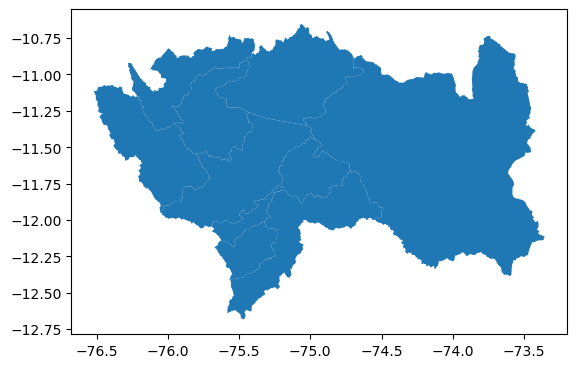

In [7]:
df.plot()

In [8]:
#leer data como json 
merged_json=json.loads(df.to_json())

#convertir objeto a string
json_data=json.dumps(merged_json)

In [9]:
#importamos funciones de bokeh 
from bokeh.io import output_notebook, show , output_file, save
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, HoverTool
from bokeh.palettes import brewer
import plotly as plt 

In [10]:
#max color 
max_color=df['POBTOTAL'].max()
#cargar la data json_data
gsource=GeoJSONDataSource(geojson=json_data)
#definimos una paleta de colores
colores=brewer['YlGnBu'][9]
#revertir la paleta para que a mayor numero, mas oscuro
colores=colores[::-1]
#inicializar linearcolormapper para que asocie un numero a los colores
color_mapper=LinearColorMapper(palette=colores,low=0,high=max_color)
#agregar hovers, HoverTool,name,tools
hover=HoverTool(name='NOMBPROV',tooltips=[('PROVINCIA','@NOMBPROV'),
                                          ('POBLACION','@POBTOTAL')])
#creamos el objeto figura
fig=figure(title='Mapa de Junin',
           toolbar_location=None,
              tools=[hover])
#ocultamos los ejes
fig.xgrid.grid_line_color=None
fig.ygrid.grid_line_color=None
fig.axis.visible=False
#agreagamos provincias
fig.patches('xs','ys',
            source=gsource,
            fill_color={'field':'POBTOTAL','transform':color_mapper},
            name='provincias')
#generamos la figura
output_notebook()
show(fig)
#guardamos la figura como html
output_file('junin.html')
save(fig)

Loading BokehJS ...

'/home/kali/datascience/code/junin.html'